## DS24MS03 - Aditya Rajshekhar Mahamuni

### Project - Cardiovascular Risk
### Problem Statement
* Predict whether a patient has a 10-year risk of future coronary heart disease (CHD)

#### Importing libraries 

In [72]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

#### Loading dataset

In [4]:
df = pd.read_csv('data_cardiovascular_risk.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#### Handling missing values

In [8]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
df = df.dropna()

#### No duplicate values

In [11]:
df.duplicated().sum()

0

#### Dropping unnecessary columns

In [13]:
df = df.drop(columns=['id'])

#### One-Hot encoding

In [15]:
df = pd.get_dummies(df, drop_first=True).astype(int)

#### Outlier treatment

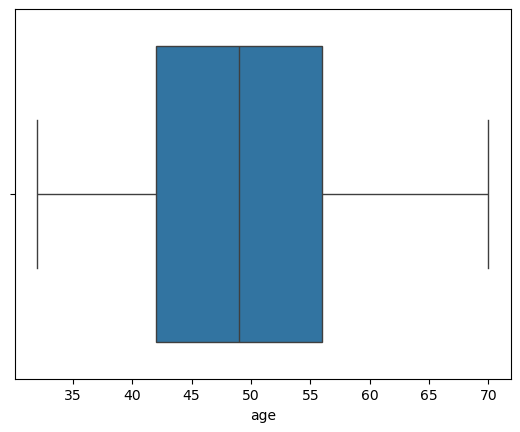

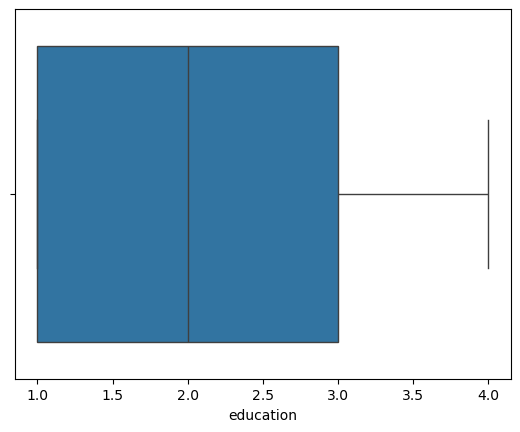

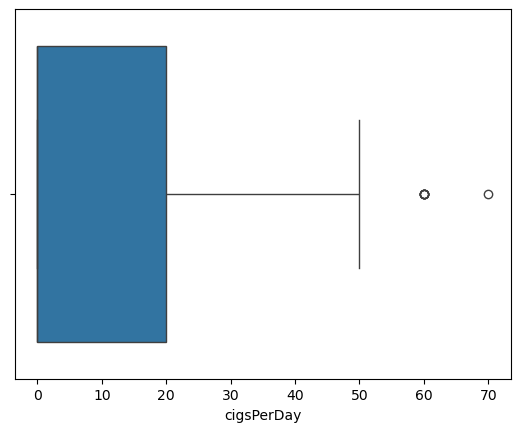

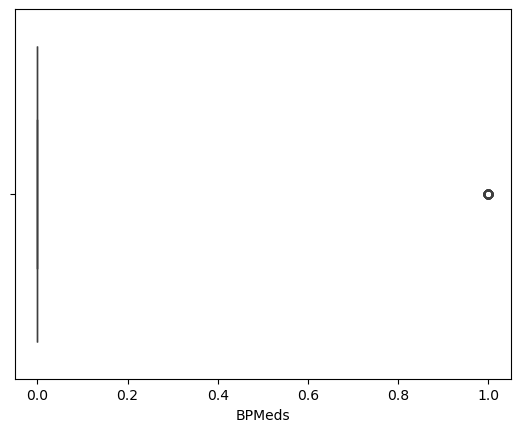

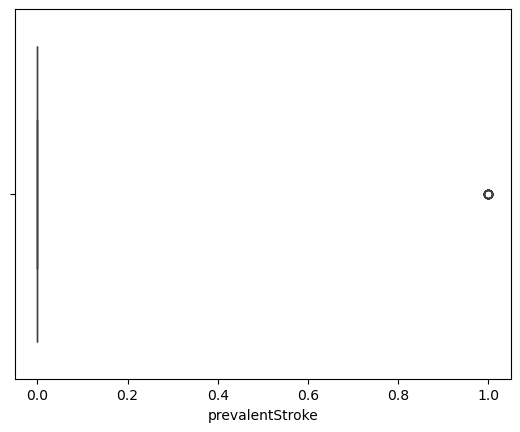

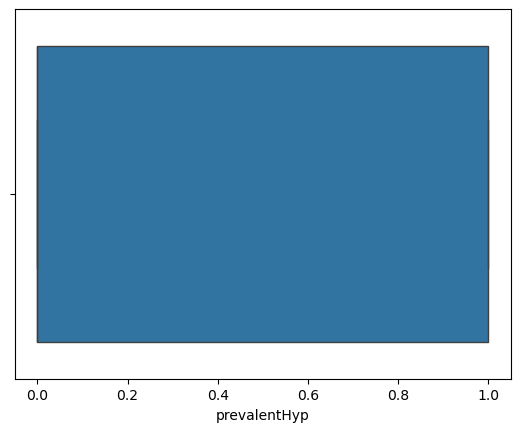

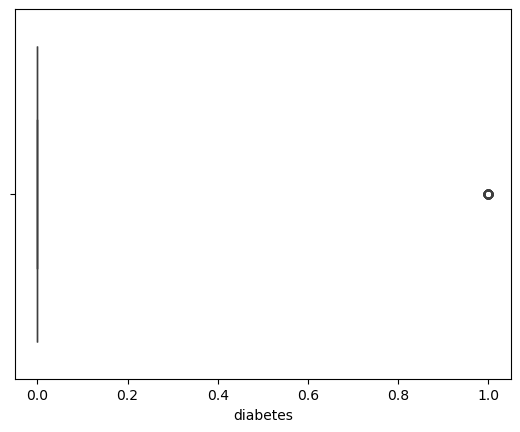

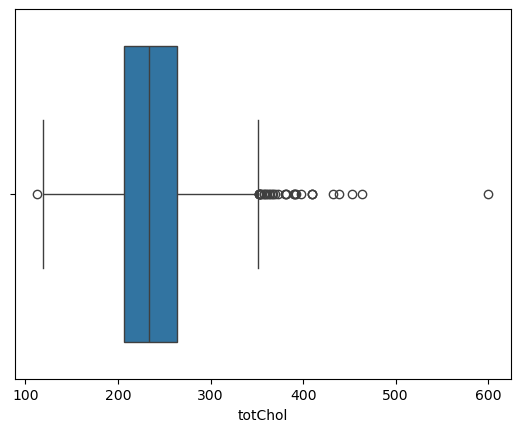

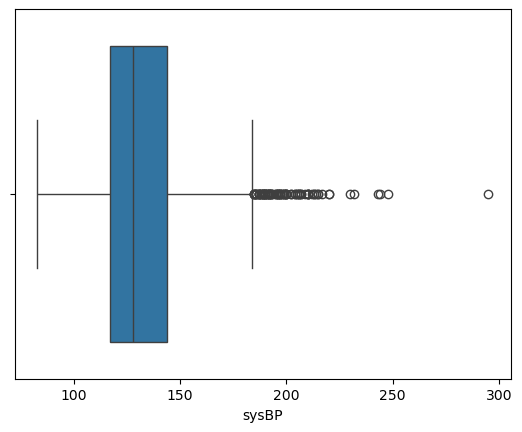

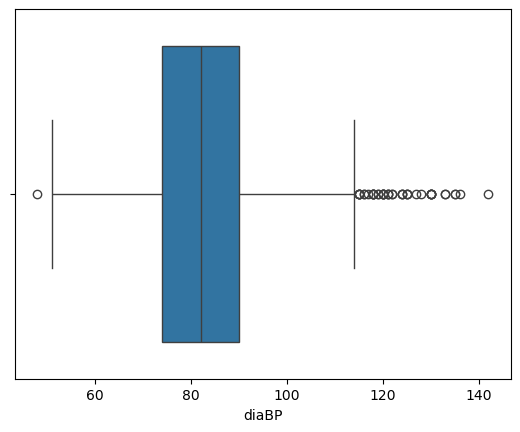

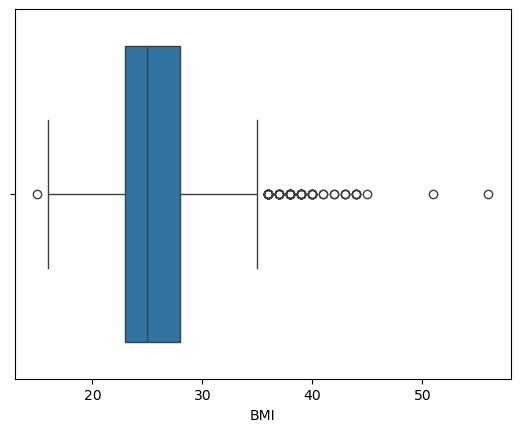

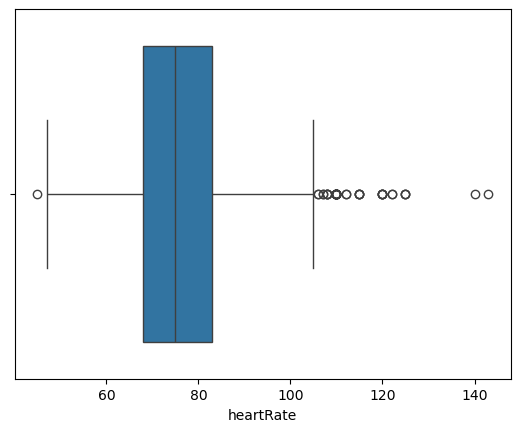

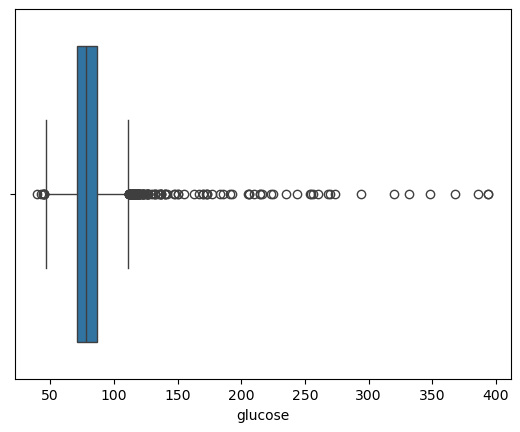

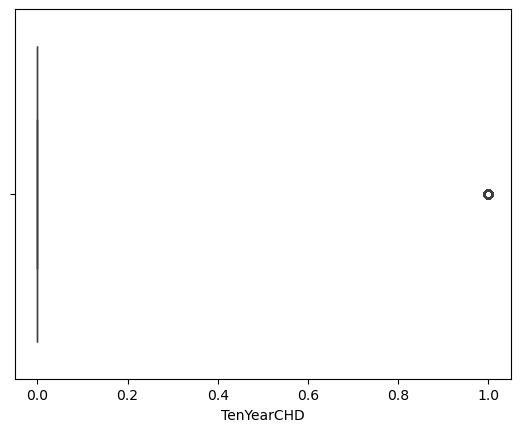

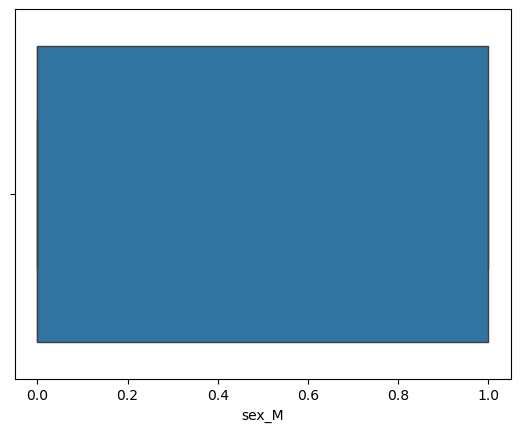

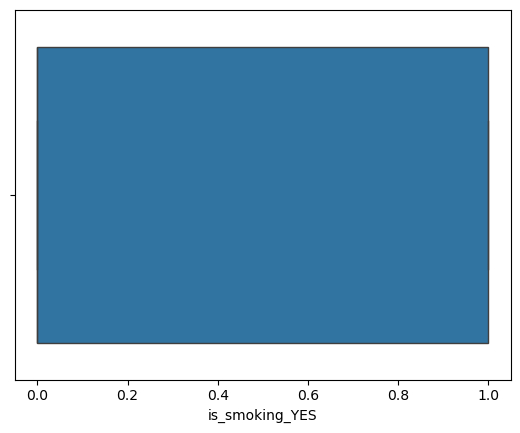

In [17]:
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

In [76]:
# Model is giving better accuracy even if we don't remove outliers, that's why keeping it
# df = df[df.totChol < 430]
# df = df[df.glucose < 300]
# df = df[df.sysBP < 230]
# df = df[df.BMI < 50]

### EDA

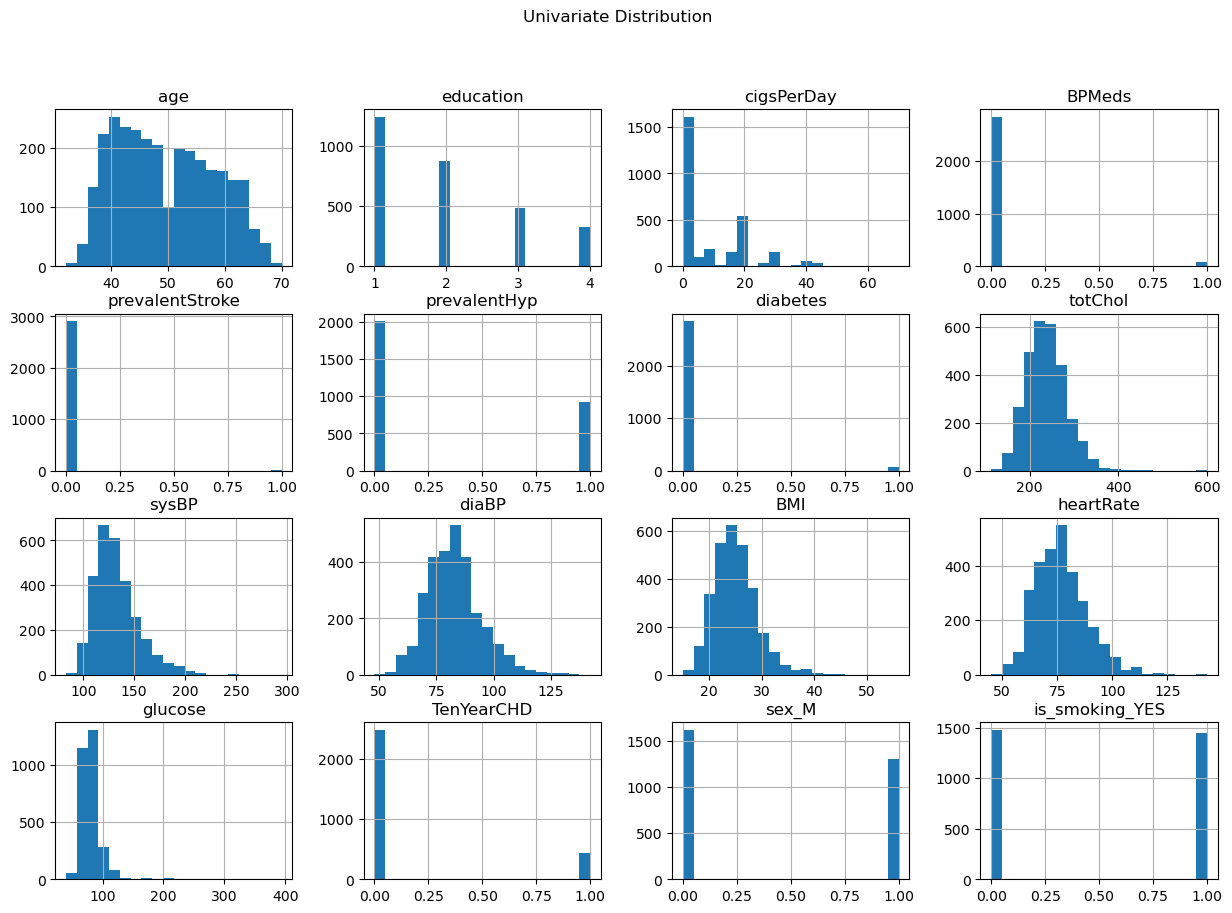

In [19]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Univariate Distribution")
plt.show()

In [20]:
df.columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'sex_M', 'is_smoking_YES'],
      dtype='object')

In [21]:
 df_1 = df[['age',  'cigsPerDay',   'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

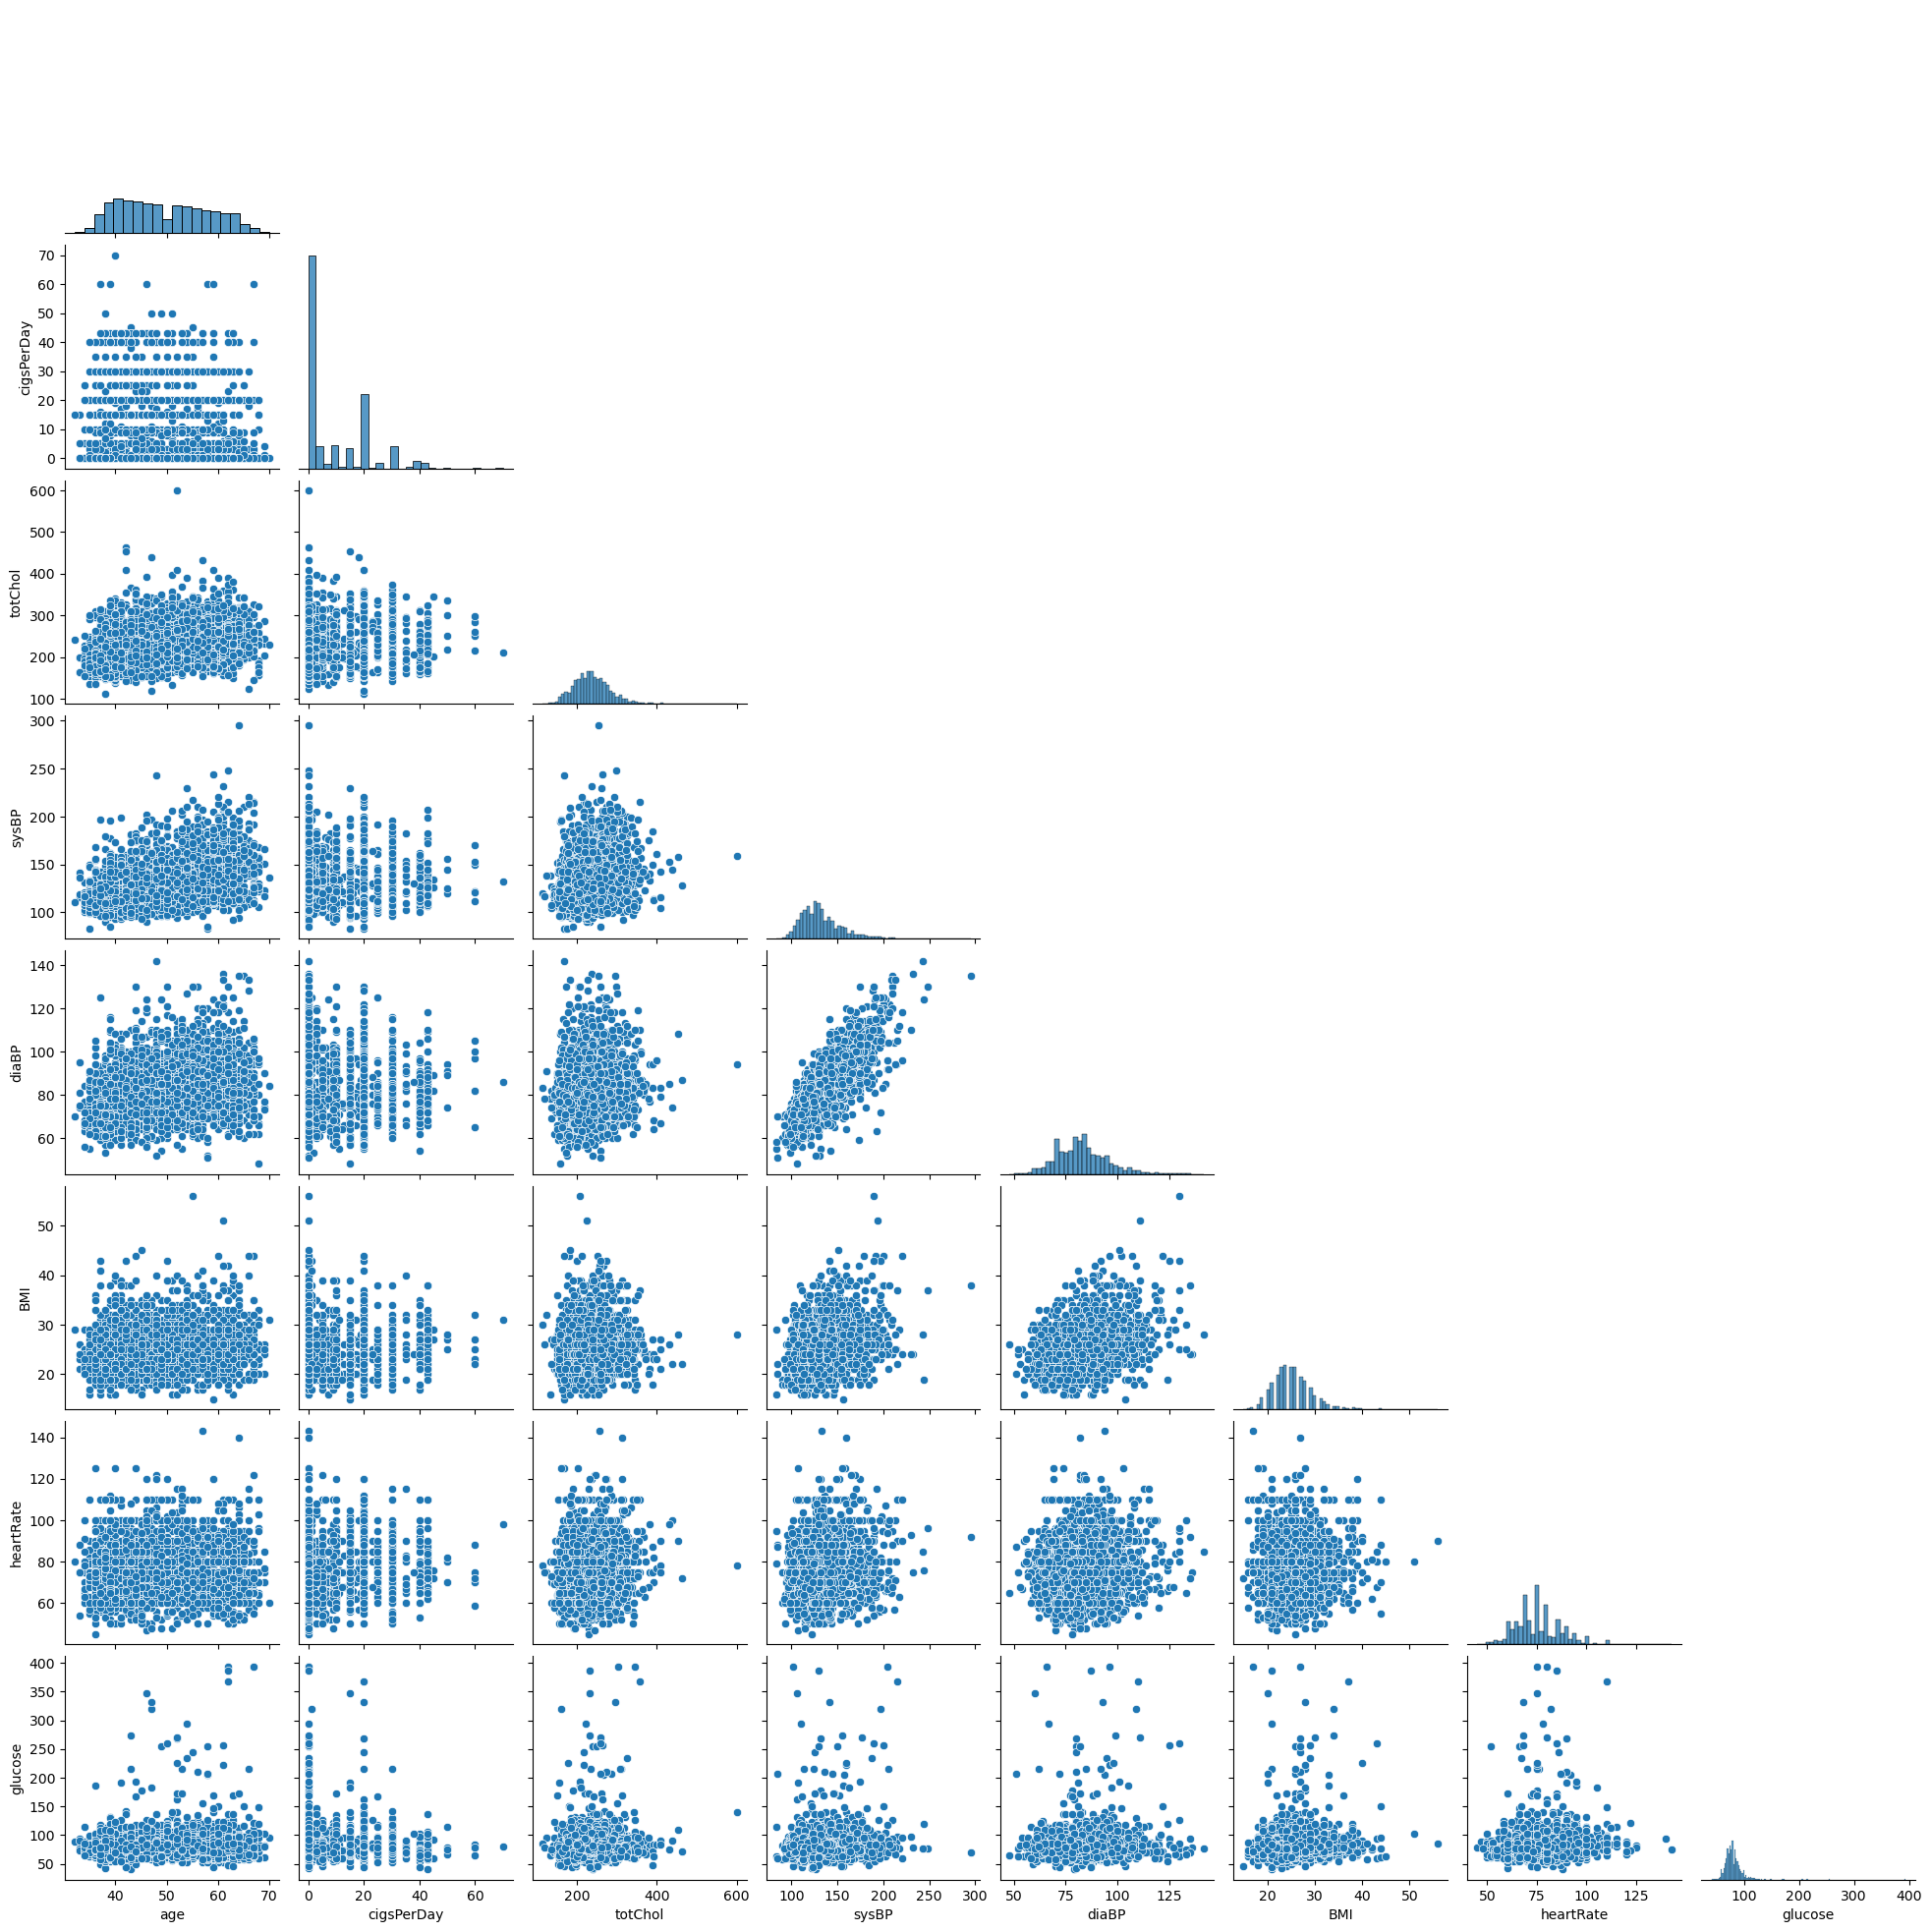

In [22]:
sns.pairplot(df_1, corner=True);

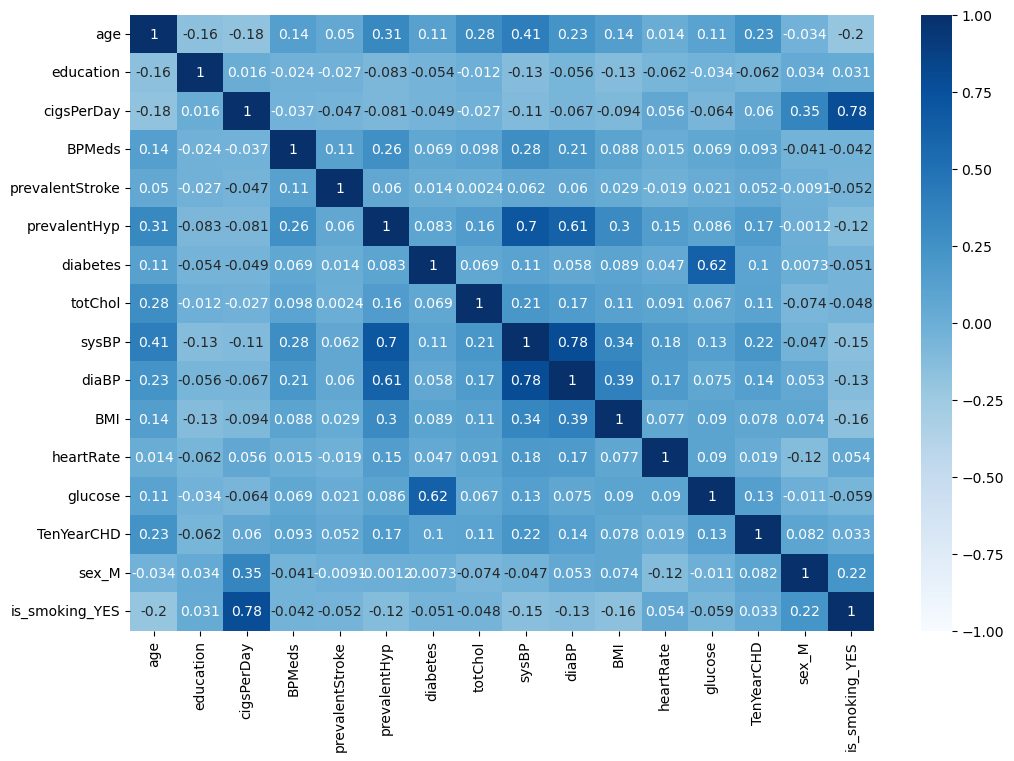

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, vmin=-1, vmax=1);

### Skewness and Kurtosis

In [25]:
df.skew().reset_index().rename(columns={'index': 'Feature', 0: 'Skewness'})

,Feature,Skewness
0,age,0.226753
1,education,0.704643
2,cigsPerDay,1.193098
3,BPMeds,5.506672
4,prevalentStroke,12.640453
5,prevalentHyp,0.800359
6,diabetes,5.840662
7,totChol,0.687534
8,sysBP,1.195991
9,diaBP,0.700220


In [26]:
df.kurt().reset_index().rename(columns={'index': 'Feature', 0: 'Kurtosis'})

,Feature,Kurtosis
0,age,-1.007895
1,education,-0.693300
2,cigsPerDay,0.858283
3,BPMeds,28.342803
4,prevalentStroke,157.888930
5,prevalentHyp,-1.360356
6,diabetes,32.135289
7,totChol,2.103670
8,sysBP,2.516110
9,diaBP,1.225403


### Train_Test_Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

### Standardization

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
std = StandardScaler()

In [34]:
X_train_scaled = std.fit_transform(X_train)

In [35]:
X_test_scaled = std.transform(X_test)

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log = LogisticRegression()

In [39]:
log.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
print(f'Train accuracy: {log.score(X_train_scaled, y_train)*100}')
print(f'Test accuracy: {log.score(X_test_scaled, y_test)*100}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, log.predict(X_test_scaled)))
print()
print(f'Precision: {precision_score(y_test, log.predict(X_test_scaled))*100}')
print(f'Recall: {recall_score(y_test, log.predict(X_test_scaled))*100}')
print(f'F1 Score: {f1_score(y_test, log.predict(X_test_scaled))*100}')

Train accuracy: 85.68987612131568
Test accuracy: 85.32423208191126

Confusion Matrix:
[[491  10]
 [ 76   9]]

Precision: 47.368421052631575
Recall: 10.588235294117647
F1 Score: 17.307692307692307


### KNN Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [45]:
print(f'Train accuracy: {knn.score(X_train_scaled, y_train)*100}')
print(f'Test accuracy: {knn.score(X_test_scaled, y_test)*100}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, knn.predict(X_test_scaled)))
print()
print(f'Precision: {precision_score(y_test, knn.predict(X_test_scaled))*100}')
print(f'Recall: {recall_score(y_test, knn.predict(X_test_scaled))*100}')
print(f'F1 Score: {f1_score(y_test, knn.predict(X_test_scaled))*100}')

Train accuracy: 86.07432721059376
Test accuracy: 82.93515358361775

Confusion Matrix:
[[479  22]
 [ 78   7]]

Precision: 24.137931034482758
Recall: 8.235294117647058
F1 Score: 12.280701754385964


### SVC

In [47]:
from sklearn.svm import SVC

In [48]:
svc = SVC()

In [49]:
svc.fit(X_train_scaled, y_train)

SVC()

In [50]:
print(f'Train accuracy: {svc.score(X_train_scaled, y_train)*100}')
print(f'Test accuracy: {svc.score(X_test_scaled, y_test)*100}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, svc.predict(X_test_scaled)))
print()
print(f'Precision: {precision_score(y_test, svc.predict(X_test_scaled))*100}')
print(f'Recall: {recall_score(y_test, svc.predict(X_test_scaled))*100}')
print(f'F1 Score: {f1_score(y_test, svc.predict(X_test_scaled))*100}')

Train accuracy: 86.0316104228962
Test accuracy: 85.49488054607508

Confusion Matrix:
[[500   1]
 [ 84   1]]

Precision: 50.0
Recall: 1.1764705882352942
F1 Score: 2.2988505747126435


### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt = DecisionTreeClassifier()

In [54]:
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [55]:
print(f'Train accuracy: {dt.score(X_train_scaled, y_train)*100}')
print(f'Test accuracy: {dt.score(X_test_scaled, y_test)*100}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, dt.predict(X_test_scaled)))
print()
print(f'Precision: {precision_score(y_test, dt.predict(X_test_scaled))*100}')
print(f'Recall: {recall_score(y_test, dt.predict(X_test_scaled))*100}')
print(f'F1 Score: {f1_score(y_test, dt.predict(X_test_scaled))*100}')

Train accuracy: 100.0
Test accuracy: 73.72013651877133

Confusion Matrix:
[[409  92]
 [ 62  23]]

Precision: 20.0
Recall: 27.058823529411764
F1 Score: 23.0


### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf = RandomForestClassifier()

In [59]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [60]:
print(f'Train accuracy: {rf.score(X_train_scaled, y_train)*100}')
print(f'Test accuracy: {rf.score(X_test_scaled, y_test)*100}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, rf.predict(X_test_scaled)))
print()
print(f'Precision: {precision_score(y_test, rf.predict(X_test_scaled))*100}')
print(f'Recall: {recall_score(y_test, rf.predict(X_test_scaled))*100}')
print(f'F1 Score: {f1_score(y_test, rf.predict(X_test_scaled))*100}')

Train accuracy: 100.0
Test accuracy: 84.81228668941979

Confusion Matrix:
[[490  11]
 [ 78   7]]

Precision: 38.88888888888889
Recall: 8.235294117647058
F1 Score: 13.592233009708737


### XGBClassifier

In [62]:
from xgboost import XGBClassifier

In [63]:
xgb = XGBClassifier()

In [64]:
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [65]:
print(f'Train accuracy: {xgb.score(X_train_scaled, y_train)*100}')
print(f'Test accuracy: {xgb.score(X_test_scaled, y_test)*100}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, xgb.predict(X_test_scaled)))
print()
print(f'Precision: {precision_score(y_test, xgb.predict(X_test_scaled))*100}')
print(f'Recall: {recall_score(y_test, xgb.predict(X_test_scaled))*100}')
print(f'F1 Score: {f1_score(y_test, xgb.predict(X_test_scaled))*100}')

Train accuracy: 99.70098248611704
Test accuracy: 81.39931740614334

Confusion Matrix:
[[466  35]
 [ 74  11]]

Precision: 23.91304347826087
Recall: 12.941176470588237
F1 Score: 16.793893129770993


### Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gb = GradientBoostingClassifier()

In [69]:
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [70]:
print(f'Train accuracy: {gb.score(X_train_scaled, y_train)*100}')
print(f'Test accuracy: {gb.score(X_test_scaled, y_test)*100}')
print()
print('Confusion Matrix:')
print(confusion_matrix(y_test, gb.predict(X_test_scaled)))
print()
print(f'Precision: {precision_score(y_test, gb.predict(X_test_scaled))*100}')
print(f'Recall: {recall_score(y_test, gb.predict(X_test_scaled))*100}')
print(f'F1 Score: {f1_score(y_test, gb.predict(X_test_scaled))*100}')

Train accuracy: 88.50918410935498
Test accuracy: 83.78839590443687

Confusion Matrix:
[[485  16]
 [ 79   6]]

Precision: 27.27272727272727
Recall: 7.0588235294117645
F1 Score: 11.214953271028037


In [74]:
models = {
    'Logistic Regression': log,
    'KNN': knn,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'XG Boost': xgb,
    'SVC': svc
}

results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    results['Model'].append(name)
    results['Train Accuracy'].append(np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5))*100)
    results['Test Accuracy'].append(np.mean(cross_val_score(model, X_test_scaled, y_test, cv=5))*100)

pd.DataFrame(results).sort_values('Test Accuracy', ascending=False).reset_index(drop=True)


,Model,Train Accuracy,Test Accuracy
0,Random Forest,84.707415,85.494712
1,SVC,84.536475,85.494712
2,Logistic Regression,85.134492,84.471969
3,KNN,83.468828,84.128640
4,Gradient Boosting,84.365899,84.127191
5,XG Boost,82.614309,83.447776


### Conclusion:
* After doing cross validation(cv=5), Random Forest and Logistic Regression are the top-performing models for predicting whether a patient has a 10-year risk of future coronary heart disease (CHD)